<a href="https://colab.research.google.com/github/nselvitelli/SongRecommendations/blob/main/T_SNE_Song_Rec_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/pavlin-policar/openTSNE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import random
import string
sns.set(font_scale=2)

import scipy

!pip install opentsne
!pip install spotipy

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 4.0 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS4400 - Group/spotify_songs.csv')

feat_list = ['danceability', 'energy', 'key',
             'loudness', 'mode', 'speechiness',
             'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo', 'duration_ms']

df = data[feat_list]
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.682,0.401,2,-10.068,1,0.0236,0.27900,0.011700,0.0887,0.566,97.091,235440
1,0.303,0.880,9,-4.739,1,0.0442,0.01170,0.009940,0.3470,0.404,135.225,373512
2,0.845,0.652,6,-7.504,0,0.2160,0.00432,0.007230,0.4890,0.650,111.904,262467
3,0.425,0.378,5,-5.819,0,0.0341,0.68900,0.000000,0.0664,0.405,118.593,243067
4,0.760,0.887,9,-1.993,1,0.0409,0.03700,0.000000,0.1380,0.240,130.018,193160
...,...,...,...,...,...,...,...,...,...,...,...,...
18449,0.479,0.800,10,-5.778,0,0.0878,0.00555,0.000000,0.3350,0.211,128.012,208656
18450,0.963,0.603,2,-6.224,1,0.1800,0.06730,0.000006,0.2140,0.647,129.990,260240
18451,0.458,0.540,5,-6.457,0,0.0270,0.71500,0.000428,0.1150,0.657,142.218,191205
18452,0.832,0.666,1,-4.920,0,0.0633,0.14300,0.000000,0.0720,0.810,109.536,223890


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)

scaled_df

array([[ 0.25277925, -1.61262599, -0.92501309, ...,  0.19851176,
        -0.85990885,  0.0894389 ],
       [-2.27276039,  1.03919589,  1.01242251, ..., -0.5098084 ,
         0.52247524,  2.50102797],
       [ 1.33896121, -0.22304918,  0.18209297, ...,  0.56578888,
        -0.32292727,  0.56149709],
       ...,
       [-1.23988797, -0.84309939, -0.09468354, ...,  0.59639531,
         0.77597636, -0.68317714],
       [ 1.2523332 , -0.14554291, -1.2017896 , ...,  1.26536435,
        -0.40876893, -0.11229537],
       [ 0.13283278, -0.85970788, -0.92501309, ..., -1.30994783,
        -0.20891883,  0.65743876]])

In [ ]:
from openTSNE import TSNE

tsne = TSNE().fit(scaled_df)

tsne_df = pd.DataFrame(tsne)
tsne_df.columns = ["x", "y"]

<Axes: xlabel='x', ylabel='y'>

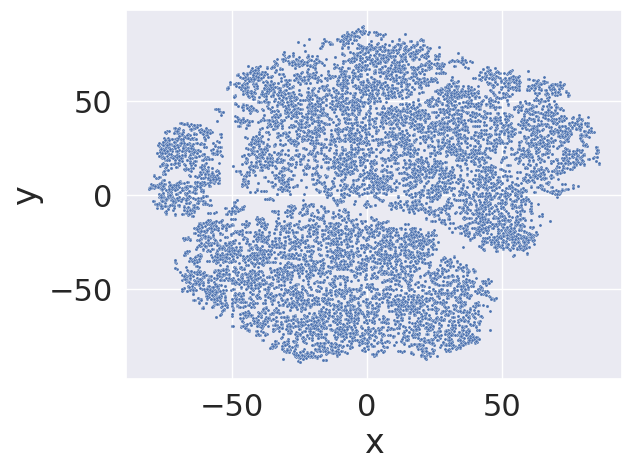

In [ ]:
sns.scatterplot(data=tsne_df, x="x", y="y",
                legend=True,
                s=5
               )

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=12, random_state=0, n_init="auto")
kmeans = km.fit(tsne)
kmeans

KMeans(n_clusters=12, n_init='auto', random_state=0)

In [ ]:
km_df = tsne_df.copy()
km_df['label'] = kmeans.labels_
km_df

,x,y,label
0,47.303328,5.168544,11
1,-44.038429,38.253862,5
2,-50.023479,-7.400060,0
3,12.000561,-22.929370,2
4,-8.723524,59.732553,10
...,...,...,...
18449,-51.103356,-29.606555,9
18450,45.463829,31.475949,6
18451,10.194403,-30.885790,2
18452,-20.861650,-85.365193,4


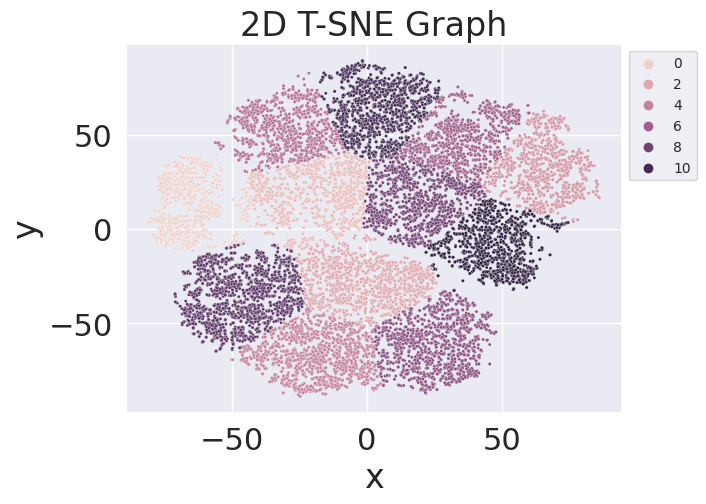

In [ ]:
sns.scatterplot(data=km_df, x="x", y="y",
                hue='label',
                legend=True,
                s=5
               )
plt.legend(fontsize='10', title_fontsize='14', bbox_to_anchor=(1.0, 1.0))
plt.title('2D T-SNE Graph')
plt.show()

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="0b0584e58353452fb0601fc618d5f81e", client_secret="a1eaee62a31647c5bcdb0f330bb139eb"))
track_uri = "https://open.spotify.com/track/7p4vHnYXkxlzvfePJVpcTr?si=cd1786609acb4cb9" # Feels Like Summer - Childish Gambino

features = spotify.audio_features(track_uri)[0]

In [ ]:
data_point = [[v for k, v in features.items() if k in feat_list]]

scaled = scaler.transform(data_point)
test = tsne.transform(scaled)

test

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


PartialTSNEEmbedding([[-8.25108653, 16.24069314]])

In [ ]:
test

PartialTSNEEmbedding([[-7.55421866, 21.37861501]])

In [ ]:
label = kmeans.predict(test)[0]
label

8

In [ ]:
km_df[km_df["label"] == label]

,x,y,label
5,-11.292099,18.969122,8
9,-7.760706,30.575261,8
18,-37.518469,18.637002,8
28,-19.286113,3.921220,8
50,-29.198894,22.345371,8
...,...,...,...
18362,-9.812290,25.861560,8
18367,-23.087597,7.394528,8
18392,-19.675327,26.545853,8
18401,-26.770207,24.669269,8


In [ ]:

dist, indxs = knn_clf1.kneighbors(X=test, n_neighbors=10)

results = data.loc[indxs[0]]

print(results[['track_name', 'track_artist']])